In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression as LR
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# tsvファイルをcsvファイルに変更してから読み込み

In [2]:
df_train = pd.read_csv('train.csv', delimiter='\t')

In [3]:
df_train.head()

,id,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,3,1,1,female,35.0,1,0,53.1000,S
1,4,0,3,male,35.0,0,0,8.0500,S
2,7,0,3,male,2.0,3,1,21.0750,S
3,9,1,2,female,14.0,1,0,30.0708,C
4,11,1,1,female,58.0,0,0,26.5500,S


In [4]:
df_test = pd.read_csv('test.csv', delimiter='\t')

In [5]:
df_test.head()

,id,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,2,3,female,26.0,0,0,7.9250,S
3,5,3,male,NaN,0,0,8.4583,Q
4,6,1,male,54.0,0,0,51.8625,S


In [6]:
print(df_train.isnull().sum())
print(df_test.isnull().sum())

id           0
survived     0
pclass       0
sex          0
age         85
sibsp        0
parch        0
fare         0
embarked     2
dtype: int64
id           0
pclass       0
sex          0
age         92
sibsp        0
parch        0
fare         0
embarked     0
dtype: int64


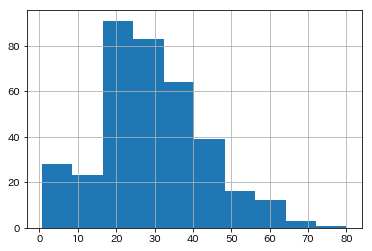

In [23]:
df_train['age'].hist()

In [8]:
print(df_train['age'].mean())
print(df_train['age'].median())
# 平均と中央値にはあまり違いはない

29.211583333333333
28.0


In [9]:
print(df_test['age'].mean())
print(df_test['age'].median())

30.194915254237287
28.25


In [10]:
df_train['age'] = df_train['age'].fillna(df_train['age'].median())
df_test['age']= df_test['age'].fillna(df_test['age'].median())

In [11]:
print(df_train.isnull().sum())
print(df_test.isnull().sum())

id          0
survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    2
dtype: int64
id          0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64


In [12]:
# embarked毎のカウント数を確認
df_train['embarked'].value_counts()

S    325
C     79
Q     39
Name: embarked, dtype: int64

In [13]:
# Sが多いのでSを補完する
df_train['embarked'] = df_train['embarked'].fillna('S')

In [14]:
print(df_train.isnull().sum())

id          0
survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64


In [15]:
#Sが+2になっているかどうか確認
df_train['embarked'].value_counts()

S    327
C     79
Q     39
Name: embarked, dtype: int64

In [17]:
# survivedとの相関を見たいので文字列型のカラムをダミー変数に変換したい
# どのカラムが文字列型を確認
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445 entries, 0 to 444
Data columns (total 9 columns):
id          445 non-null int64
survived    445 non-null int64
pclass      445 non-null int64
sex         445 non-null object
age         445 non-null float64
sibsp       445 non-null int64
parch       445 non-null int64
fare        445 non-null float64
embarked    445 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 31.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446 entries, 0 to 445
Data columns (total 8 columns):
id          446 non-null int64
pclass      446 non-null int64
sex         446 non-null object
age         446 non-null float64
sibsp       446 non-null int64
parch       446 non-null int64
fare        446 non-null float64
embarked    446 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 28.0+ KB
None


In [18]:
# sexとobjectをダミー変数に変更する
df_train["sex"] = pd.get_dummies(df_train[["sex"]])
df_train["embarked"] = pd.get_dummies(df_train["embarked"])
df_test["sex"] = pd.get_dummies(df_test[["sex"]])
df_test["embarked"] = pd.get_dummies(df_test["embarked"])

In [19]:
print(df_train.head())
print(df_test.head())

   id  survived  pclass  sex   age  sibsp  parch     fare  embarked
0   3         1       1    1  35.0      1      0  53.1000         0
1   4         0       3    0  35.0      0      0   8.0500         0
2   7         0       3    0   2.0      3      1  21.0750         0
3   9         1       2    1  14.0      1      0  30.0708         1
4  11         1       1    1  58.0      0      0  26.5500         0
   id  pclass  sex    age  sibsp  parch     fare  embarked
0   0       3    0  22.00      1      0   7.2500         0
1   1       1    1  38.00      1      0  71.2833         1
2   2       3    1  26.00      0      0   7.9250         0
3   5       3    0  28.25      0      0   8.4583         0
4   6       1    0  54.00      0      0  51.8625         0


In [20]:
df_train.corr()
# survivedと相関が高いのはsex,pclass, fare

,id,survived,pclass,sex,age,sibsp,parch,fare,embarked
id,1.000000,0.024264,-0.059345,-0.033435,0.105383,-0.020491,-0.031417,0.077649,-0.012297
survived,0.024264,1.000000,-0.358097,0.559465,-0.069804,-0.045087,0.079669,0.258605,0.182568
pclass,-0.059345,-0.358097,1.000000,-0.193761,-0.280203,0.069857,-0.015726,-0.549651,-0.207779
sex,-0.033435,0.559465,-0.193761,1.000000,-0.063916,0.097883,0.220046,0.168935,0.102369
age,0.105383,-0.069804,-0.280203,-0.063916,1.000000,-0.187563,-0.140368,0.101165,0.003845
sibsp,-0.020491,-0.045087,0.069857,0.097883,-0.187563,1.000000,0.423522,0.164773,-0.074573
parch,-0.031417,0.079669,-0.015726,0.220046,-0.140368,0.423522,1.000000,0.241855,-0.014436
fare,0.077649,0.258605,-0.549651,0.168935,0.101165,0.164773,0.241855,1.000000,0.219983
embarked,-0.012297,0.182568,-0.207779,0.102369,0.003845,-0.074573,-0.014436,0.219983,1.000000


In [21]:
# 上記3つ以外の特徴量を削除する
# axis=1を忘れやすいので注意
df_train1 = df_train.drop(['id', 'age', 'sibsp', 'parch', 'embarked'], axis=1)
df_test1 = df_test.drop(['id', 'age', 'sibsp', 'parch', 'embarked'], axis=1)

In [22]:
print(df_train1.head())
print(df_test1.head())

   survived  pclass  sex     fare
0         1       1    1  53.1000
1         0       3    0   8.0500
2         0       3    0  21.0750
3         1       2    1  30.0708
4         1       1    1  26.5500
   pclass  sex     fare
0       3    0   7.2500
1       1    1  71.2833
2       3    1   7.9250
3       3    0   8.4583
4       1    0  51.8625


In [ ]:
# ここからモデル作成

In [23]:
# SalePrice以外のすべての変数を特徴量にする
trainX = df_train1.drop('survived', axis=1)

In [24]:
# survivedを目的変数にする
trainY = df_train1['survived']

In [49]:
# モデルはランダムフォレストを選択、インスタンスの作成
# 今回はn_estimators = 80 に
model1 = RandomForestClassifier(n_estimators = 80, random_state=0)

In [50]:
# 学習
model1.fit(trainX, trainY)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=90, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [51]:
testX = df_test1

In [52]:
testY = model1.predict(testX)

In [53]:
output = pd.read_csv('test.csv', delimiter='\t')

In [54]:
output.head()

,id,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,2,3,female,26.0,0,0,7.9250,S
3,5,3,male,NaN,0,0,8.4583,Q
4,6,1,male,54.0,0,0,51.8625,S


In [55]:
output['survived'] = testY

In [56]:
# いったんcsvファイルで保存
# その後、http://cgikon.com/tools/chfile/chfile_1.htmlでtsvファイルに変換
output[['id', 'survived']].to_csv('sample_submit.csv', header=False, index= False)

In [ ]:
# 結果は0.7986299291118385